In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 150
import glob, os

import timeit
import itertools

# Results from GOrilla (step 2)

## The next cell was used to separate the gene names in the "Genes" column into easy to parse lists

## Don't need to run the next cell again if can access `Processed/GO_process` and `Processed/GO_function` pickle files (takes a few minutes to run)

In [2]:
# genes = pd.read_csv("../Data/human_genes.txt", sep="\t", header=None).iloc[:, 0].values
# go_function_raw = pd.read_csv("../Data/GO_function.tsv", sep="\t")
# go_process_raw = pd.read_csv("../Data/GO_process.tsv", sep="\t")

# def get_gene_lists(df, ref_gene_set):
    
#     genes = df["Genes"].values
    
#     genes_cleaned = []
    
#     # nested list
#     for lst in genes:
        
#         genes_list = lst.strip("[]").split(", ")
            
#         single_go_list = []
        
#         for entry in genes_list:
            
#             # because some descriptions are long and contain multiple commas, take only those with a hyphen, the name before the hyphen is the gene name
#             if '-' in entry:
                
#                 # make sure that every gene is in the list of original genes, otherwise it's not actually a gene
#                 # this is because of deprecated gene names. GOrilla uses some old names 
#                 # don't keep the description of the gene that comes after the hyphen
#                 if entry.split("  -")[0] in ref_gene_set:
                    
#                     single_go_list.append(entry.split("  -")[0])
        
#         genes_cleaned.append(single_go_list)
    
#     return genes_cleaned

# # Takes several seconds to a minute to run
# process_cleaned_genes = get_gene_lists(go_process_raw, genes)
# go_process_raw["Genes"] = process_cleaned_genes

# function_cleaned_genes = get_gene_lists(go_function_raw, genes)
# go_function_raw["Genes"] = function_cleaned_genes

# go_process_raw["Number of Genes"] = [len(lst) for lst in go_process_raw["Genes"]]
# go_function_raw["Number of Genes"] = [len(lst) for lst in go_function_raw["Genes"]]

# go_process = go_process_raw.sort_values("Enrichment", ascending=False).reset_index(drop=True)
# go_function = go_function_raw.sort_values("Enrichment", ascending=False).reset_index(drop=True)

# # save them to pickle files -- pickle because the Genes column contains list entries, and they'll be converted to strings in a csv
# go_process.to_pickle("../Processed/GO_process")
# go_function.to_pickle("../Processed/GO_function")

# Get cleaned data from steps 1 and 2

In [3]:
virus_human = pd.read_csv("../Processed/virus_human.csv")

go_process = pd.read_pickle("../Processed/GO_process")
go_function = pd.read_pickle("../Processed/GO_function")

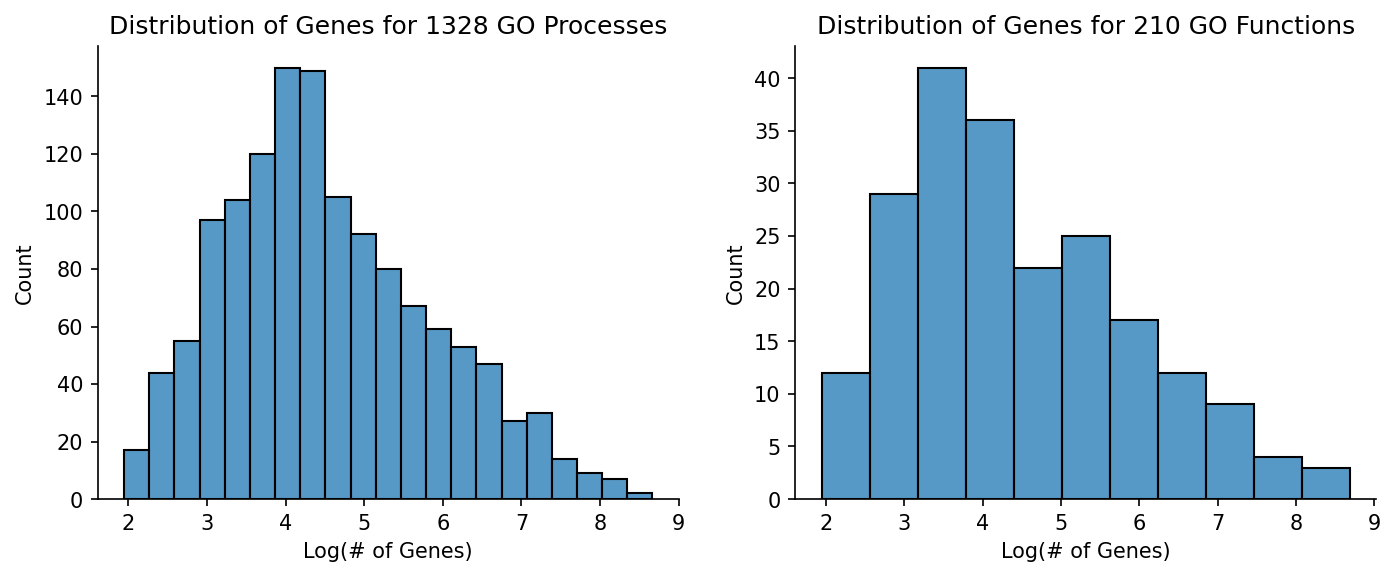

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

sns.histplot(np.log(go_process["Number of Genes"]), ax=ax[0])
ax[0].set_title(f"Distribution of Genes for {len(go_process)} GO Processes")
ax[0].set_xlabel("Log(# of Genes)")

sns.histplot(np.log(go_function["Number of Genes"]), ax=ax[1])
ax[1].set_title(f"Distribution of Genes for {len(go_function)} GO Functions")
ax[1].set_xlabel("Log(# of Genes)")

sns.despine()
plt.show()

# Functional Enrichment

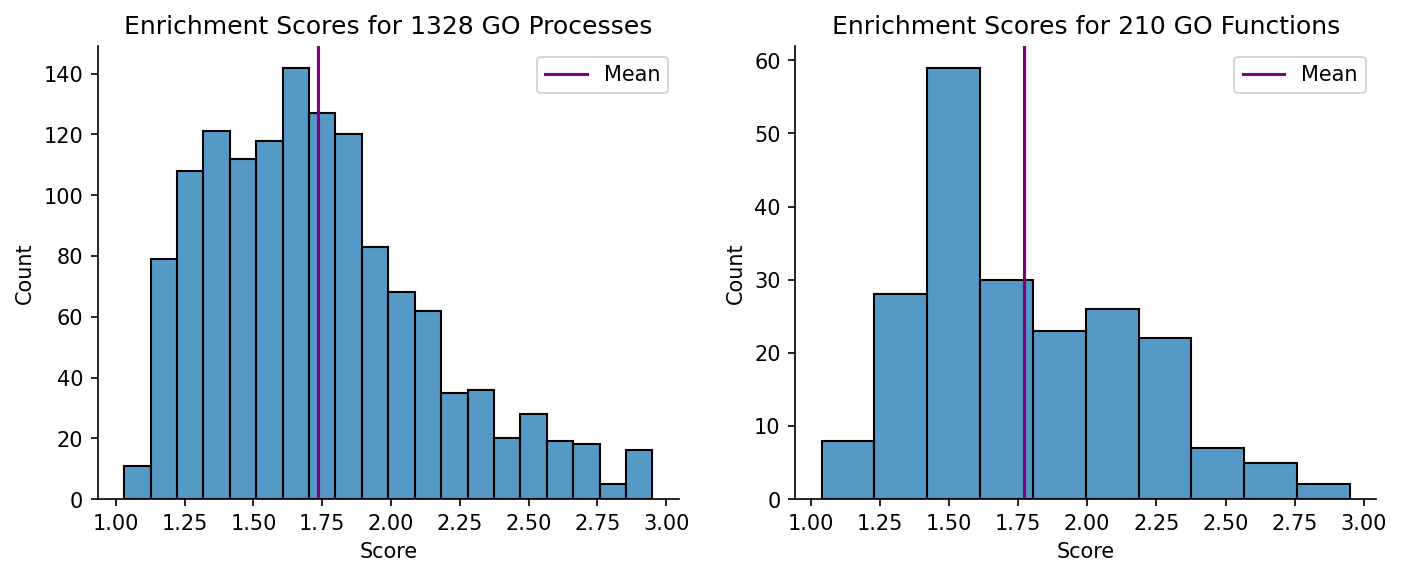

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

sns.histplot(go_process["Enrichment"], ax=ax[0])
ax[0].axvline(x=np.mean(go_process["Enrichment"]), color="purple", label="Mean")
ax[0].set_title(f"Enrichment Scores for {len(go_process)} GO Processes")
ax[0].set_xlabel("Score")
ax[0].legend()

sns.histplot(go_function["Enrichment"], ax=ax[1])
ax[1].axvline(x=np.mean(go_function["Enrichment"]), color="purple", label="Mean")
ax[1].set_title(f"Enrichment Scores for {len(go_function)} GO Functions")
ax[1].set_xlabel("Score")
ax[1].legend()

sns.despine()
plt.savefig("../Figures/enrichment_scores.svg")

# Functions will be more interesting to look at because they are broader, i.e. DNA/RNA binding, ubiquitin, transcription/translation changes during viral infection, etc.

<b>From the GOrilla website, the definition of enrichment is</b>

Enrichment (N, B, n, b) is defined as follows:
<ul>
    <li>N - is the total number of genes</li>
    <li>B - is the total number of genes associated with a specific GO term</li>
    <li>n - is the number of genes in the top of the user's input list or in the target set when appropriate</li>
    <li>b - is the number of genes in the intersection</li>
</ul>

Enrichment = (b/n) / (B/N)

In [6]:
function_high = go_function.loc[go_function["Enrichment"] > np.mean(go_function["Enrichment"])]

# largest q-value post FDR is significant at alpha = 0.05
print(function_high["FDR q-value"].max())
function_high

0.0211


,GO Term,Description,P-value,FDR q-value,Enrichment,N,B,n,b,Genes,Number of Genes
0,GO:0016885,"ligase activity, forming carbon-carbon bonds",5.170000e-04,1.250000e-02,2.95,18195,7,6175,7,"[MCCC1, PC, ACACA, PCCA, ACACB, PCCB, MCCC2]",7
1,GO:0008312,7S RNA binding,5.170000e-04,1.250000e-02,2.95,18195,7,6175,7,"[SRP68, SRP54, SRP19, SRP14, SRP72, EXOSC2, SRP9]",7
2,GO:0051011,microtubule minus-end binding,2.070000e-05,6.780000e-04,2.72,18195,13,6175,12,"[NUMA1, TUBGCP3, CAMSAP3, TUBGCP6, TUBGCP4, HA...",12
3,GO:0005049,nuclear export signal receptor activity,4.130000e-04,1.040000e-02,2.65,18195,10,6175,9,"[EIF4ENIF1, CSE1L, RAN, XPO5, NUP214, XPO6, XP...",9
4,GO:0051880,G-quadruplex DNA binding,4.130000e-04,1.050000e-02,2.65,18195,10,6175,9,"[XRN1, DHX36, LONP1, WRN, BLM, CNBP, RAD50, NM...",9
...,...,...,...,...,...,...,...,...,...,...,...
82,GO:0003729,mRNA binding,4.780000e-22,5.290000e-20,1.82,18195,281,6175,174,"[DHX9, DHX36, PABPC5, FMR1, DDX6, DDX5, G3BP1,...",174
83,GO:0070063,RNA polymerase binding,2.000000e-05,6.630000e-04,1.81,18195,57,6175,35,"[DHX9, RRN3, WAC, ERCC5, PPIB, BRCA1, ANP32B, ...",35
84,GO:0002039,p53 binding,4.800000e-06,1.840000e-04,1.81,18195,65,6175,40,"[TAF9, EEF2, MUL1, PLK3, EHMT1, TAF1, ZNF385A,...",40
85,GO:0005080,protein kinase C binding,3.950000e-05,1.220000e-03,1.80,18195,54,6175,33,"[TRPV4, PDLIM5, NELL2, NELL1, IRS1, GLRX3, SQS...",30


In [7]:
# flatten the array of lists of genes and take the unique ones
function_high_genes = np.unique([gene for genes_list in function_high.Genes for gene in genes_list])
print(f"{len(function_high_genes)} genes in the enriched GO functions")

# make a dictionary for easy searching of genes associated with individual GO terms
function_high_dict = dict(zip(function_high["GO Term"], function_high["Genes"]))

2139 genes in the enriched GO functions


In [8]:
def go_terms_for_gene(go_dict, gene):
    
    go_res = []

    for key in go_dict.keys():
        if gene in go_dict[key]:
            go_res.append(key)
            
    return go_res

In [10]:
function_high_GO = [go_terms_for_gene(function_high_dict, gene) for gene in function_high_genes]
assert len(function_high_GO) == len(function_high_genes)

# store in a dictionary for efficient searching
function_high_GO_dict = dict(zip(function_high_genes, function_high_GO))

# Hypothesis: Proteins that share all of their GO functions have similar domains.

## 1. For the genes in enriched GO functions, compute how many GO functions they share

## 2. Compute Jaccard distance, which is a normalized version of step 1.

$$D = \frac{|A \cap B|}{|A \cup B|}$$

## 3. Query all proteins on PFAM (just in case), correlate # of shared PFAM domains with # of shared GO functions

In [10]:
def jaccard_GO(go_dict, gene1, gene2):
    
    go_1 = go_dict[gene1]
    go_2 = go_dict[gene2]
    
    return len(set(go_1).intersection(go_2)) / len(set(go_1).union(go_2))

def GO_overlap(go_dict, gene1, gene2):
    
    go_1 = go_dict[gene1]
    go_2 = go_dict[gene2]
    
    # return the number of GO functions shared by two proteins, not normalized
    return len(set(go_1).intersection(go_2))

In [11]:
# doesn't include cases where both genes are the same. Don't care about that for GO function analysis, it's not PPIs
gene_pairs = list(itertools.combinations(function_high_genes, 2))
print(f"{len(gene_pairs)} unique gene pairs")

2286591 unique gene pairs


### The next cell takes several seconds to run. Don't run it again

In [12]:
GO_overlap_lst = []
GO_jaccard_lst = []

for pair in gene_pairs:
    GO_overlap_lst.append(GO_overlap(function_high_GO_dict, pair[0], pair[1]))
    GO_jaccard_lst.append(jaccard_GO(function_high_GO_dict, pair[0], pair[1]))

genes_1, genes_2 = list(zip(*gene_pairs))

In [13]:
df_res = pd.DataFrame({"gene_1": genes_1, "gene_2": genes_2, "Jaccard": GO_jaccard_lst, "num_GO_overlap": GO_overlap_lst})

# don't keep nodes that have no GO overlap, reduces the size by a factor of 5
high_df = df_res.query("num_GO_overlap != 0").reset_index(drop=True)

high_df_genes = set(high_df["gene_1"]).union(high_df["gene_2"])
print(f"{len(high_df_genes)} genes share at least one GO function with another gene")

high_df.head()

2139 genes share at least one GO function with another gene


,gene_1,gene_2,Jaccard,num_GO_overlap
0,A1CF,AARS2,0.166667,1
1,A1CF,AATF,0.250000,1
2,A1CF,ABCF1,0.200000,1
3,A1CF,ABT1,0.333333,1
4,A1CF,ACIN1,0.250000,1


In [14]:
human_fixed_df = pd.read_csv("../Data/human_proteins_fixed.tab", sep="\t")

# use this function from 02_GO_files.py
def get_genes(df, col):
    
    gene_names = []

    for _, row in df.iterrows():

        if not pd.isnull(row["Gene names"]):
            gene_names.append(row["Gene names"].split(" ")[0])
        else:
            gene_names.append(row[col].split("_")[0])
            
    return gene_names

# genes from the virus database
gene_names = get_genes(human_fixed_df, "Entry name")

# mapping from gene to uniprot KB ID
gene_uniprot_mapping = dict(zip(gene_names, human_fixed_df["Entry"]))

In [15]:
go_df = pd.DataFrame(dict([(key, pd.Series(value)) for key, value in function_high_GO_dict.items()])).melt().dropna()

# the next two lines are just a super sanity check
go_all = [item for sublist in list(function_high_GO_dict.values()) for item in sublist]
assert len(go_df) == len(go_all)

go_df.columns = ["Gene", "GO"]

# add the UniProt column too
go_df["UniProt"] = go_df["Gene"].map(gene_uniprot_mapping)

# save to a dataframe for easy use later
go_df.to_csv("../Processed/enriched_GO_proteins.csv", index=False)

In [16]:
# add uniprot IDs to the jaccard dataframe
high_df["uniprot_1"] = high_df["gene_1"].map(gene_uniprot_mapping)
high_df["uniprot_2"] = high_df["gene_2"].map(gene_uniprot_mapping)

nodes = list(set(high_df["uniprot_1"]).union(high_df["uniprot_2"]))
len(nodes)

2139

In [17]:
# save this to a csv to use later too. Big file (600,000+ rows)
high_df.to_csv("../Processed/GO_distances.csv.gz", compression="gzip", index=False)

In [18]:
high_df.shape

(663724, 6)

# HMMER only allows 500 sequences at a time with a maximum length of 5000

## So manually query the 7 sequences longer than 5000

## Broke up the remaining sequences into multiple fasta files and queried them

## 2139 proteins searched, not all have domains (only coils or disordered/low-complexity regions)

In [19]:
human_fixed_df_nodes = human_fixed_df.loc[human_fixed_df.Entry.isin(nodes)].reset_index(drop=True)

def write_fasta_file(df, start_index, end_index, fName):
    
    with open(fName, "w+") as file:
        
        for _, row in df.iloc[start_index:end_index, :].iterrows():
        
            # The HMM models can't search sequences longer than 5000 in the batch search feature. There are only 5 longer than 5000, so can manually search those
            if len(row["Sequence"]) <= 5000:
                file.write(">" + row["Entry"] + "\n")
                file.write(row["Sequence"] + "\n")

In [20]:
write_fasta_file(human_fixed_df_nodes, 0, 500, "../Data/proteins_seq_small_1.fasta")
write_fasta_file(human_fixed_df_nodes, 500, 1000, "../Data/proteins_seq_small_2.fasta")
write_fasta_file(human_fixed_df_nodes, 1000, 1500, "../Data/proteins_seq_small_3.fasta")
write_fasta_file(human_fixed_df_nodes, 1500, 2000, "../Data/proteins_seq_small_4.fasta")
write_fasta_file(human_fixed_df_nodes, 2000, len(human_fixed_df_nodes), "../Data/proteins_seq_small_5.fasta")

In [21]:
for _, row in human_fixed_df_nodes.iterrows():
    
    if len(row["Sequence"]) > 5000:
        print(row["Entry"])

Q9NU22
Q63HN8
Q09666
P58107
Q86UQ4
Q03001
Q8NF91
